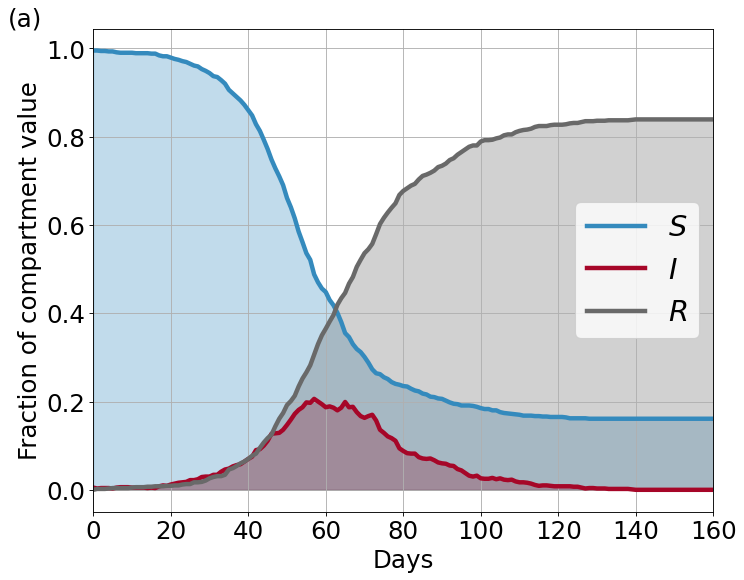

In [10]:
import numpy as np
import pyross
import matplotlib.pyplot as plt


M = 1                  # the SIR model has no age structure
Ni = 1000*np.ones(M)   # so there is only one age group
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.2            # infection rate
gIa   = 0.1            # recovery rate of asymptomatic infectives
gIs   = 0.1            # recovery rate of symptomatic infectives
alpha = 0              # fraction of asymptomatic infectives
fsa   = 1              # self-isolation of symtomatic infectives


Ia0 = np.array([0])     # the SIR model has only one kind of infective
Is0 = np.array([5])     # we take these to be symptomatic
R0  = np.array([0])     # and assume there are no recovered individuals initially
S0  = N-(Ia0+Is0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):
    return np.identity(M)

# duration of simulation and data file
Tf = 160;  Nt=160;

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.stochastic.SIR(parameters, M, Ni)

# simulate model
data = model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nt)

# plot the compartments 
plt.rcParams.update({'font.size': 22})
pyross.utils.plotSIR(data,showPlot=False)

import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 8)
fig.set_dpi(80)
fig.set_facecolor('w')
fig.set_edgecolor('w')
#figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.legend(fontsize=26,loc='best')
plt.autoscale(enable=True, axis='x', tight=True)
plt.text(-22,1.05,'(a)',fontsize=22)
fig.savefig('ex3-a.pdf',bbox_inches='tight')
plt.show()

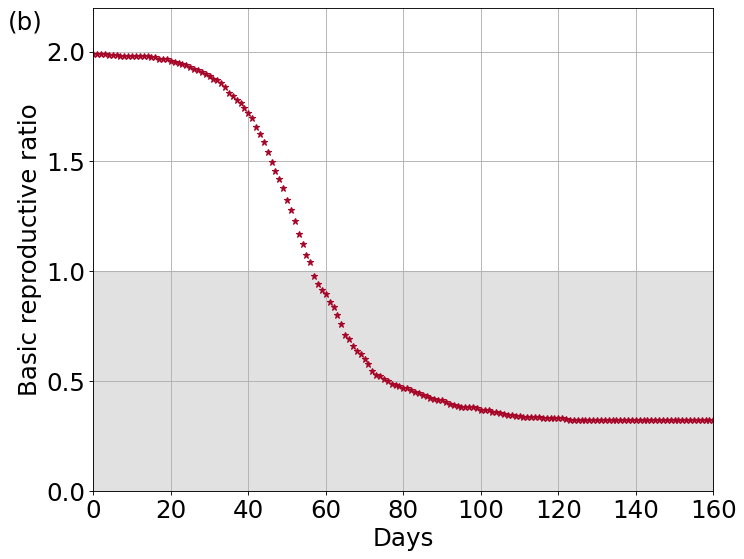

In [13]:

#print(data)
t = data['t']

# plot the basic reproductive ratio as a function of time
C=np.identity(M); contactMatrix = pyross.contactMatrix.SIR(0.25*C, 0.25*C, 0.25*C, 0.25*C)
r0de = contactMatrix.basicReproductiveRatio(data, state='dynamic')
plt.plot(r0de, '*', color='#A60628')


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 8)
fig.set_dpi(80)
fig.set_facecolor('w')
fig.set_edgecolor('w')
plt.yticks(np.arange(0, 3, step=0.5)); plt.ylim(0,2.2)
plt.autoscale(enable=True, axis='x', tight=True)
plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2)
plt.text(-22,2.1,'(b)',fontsize=22)
plt.grid()
plt.ylabel('Basic reproductive ratio')
plt.xlabel('Days')
fig.savefig('ex3-b.pdf',bbox_inches='tight')
plt.show()